# **Problem Statement:**
- The main task  is to build a model and compare by considering their ability to predict whether a person makes over 50k a year or not.

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Loading the CSV file

In [2]:
df=pd.read_csv(r"all_datasets/income_evaluation.csv") 
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## **Data cleaning**
- Before we can start modeling, we need to clean the dataset by handling missing values, and removing duplicates.
- There's a problem in the dataset : Every 'object' type column name and string values start with a whitespaces.

In [4]:
# Checking for duplicates
df.duplicated().sum()

24

In [5]:
# Removing duplicates
df.drop_duplicates(inplace=True)
df.shape

(32537, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32537 non-null  int64 
 1    workclass       32537 non-null  object
 2    fnlwgt          32537 non-null  int64 
 3    education       32537 non-null  object
 4    education-num   32537 non-null  int64 
 5    marital-status  32537 non-null  object
 6    occupation      32537 non-null  object
 7    relationship    32537 non-null  object
 8    race            32537 non-null  object
 9    sex             32537 non-null  object
 10   capital-gain    32537 non-null  int64 
 11   capital-loss    32537 non-null  int64 
 12   hours-per-week  32537 non-null  int64 
 13   native-country  32537 non-null  object
 14   income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


- There are no missing values

In [7]:
# Removing all leading spaces 
df.columns = df.columns.str.strip()

In [8]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [9]:
# Removing leading spaces in all fetaures
df['workclass'] = df['workclass'].str.strip()
df['education'] = df['education'].str.strip()
df['marital-status'] = df['marital-status'].str.strip()
df['occupation'] = df['occupation'].str.strip()
df['sex'] = df['sex'].str.strip()
df['native-country'] = df['native-country'].str.strip()
df['race'] = df['race'].str.strip()
df['income'] = df['income'].str.strip()

In [10]:
# Replacing ? with unknown in each column
df['occupation'] = df['occupation'].str.strip().replace('?','unknown')
df['workclass'] = df['workclass'].str.strip().replace('?','unknown')
df['native-country'] = df['native-country'].str.strip().replace('?','Unknown')

In [11]:
# Replacing string with descrete values 
df['sex'] = df['sex'].map({"Female":0,"Male":1}).astype(int)
df['income'] = df['income'].map({"<=50K":0,">50K":1}).astype(int)
print(df['income'].unique())

[0 1]


- Capital gain’ and ‘capital loss’ can be converted into one ‘capital’ variable which is calculated by subtracting capital loss from capital gain.

In [12]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,1,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,0,40,Cuba,0


In [13]:
# # Capital-gain and capital-loss is converted as one feature called capital
# df["capital"] = df["capital-gain"] - df["capital-loss"]
# df.drop(["capital-gain", "capital-loss"], inplace=True, axis=1)
# df.head()

# **Exploratory Data Analysis**

### Distribution of target variable

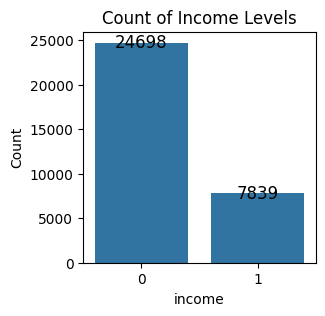

In [14]:
# Count the unique values in the 'income' column
value_counts = df['income'].value_counts()

# Create a bar plot
plt.figure(figsize=(3, 3))
ax = sns.barplot(x=value_counts.index, y=value_counts.values)

# Add labels and a title
plt.xlabel('income')
plt.ylabel('Count')
plt.title('Count of Income Levels')

# Display values on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black')

# Show the plot
plt.show()


- Mostly have income <= 50k

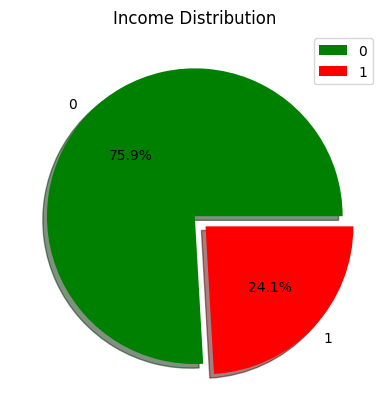

In [15]:
# Income in percentages
income = df['income'].value_counts()

colors = ['green', 'red']
explode = [0, 0.1]

plt.pie(income, labels=income.index, colors=colors, explode=explode, shadow=True, autopct='%1.1f%%')

plt.title('Income Distribution')
plt.legend(labels=income.index)

plt.show()


- As data is having heavily imbalanced. The results of the model gets effected.
- Therefore, first the data should be balanced before

<Axes: xlabel='age', ylabel='Density'>

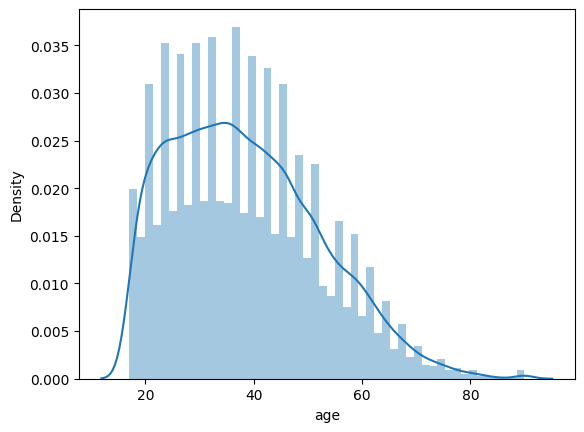

In [16]:
# Distribution of age column
sns.distplot(df['age'])

- Minimum age is 17 and maximum is 90.
- Average working age in this dataset is 38.585
- age feature is left skewed.

- In 'age' column's boxplot, age>80 (approx.) entries are outliers.
- It's natural that people prefer to leave work life at such an age.

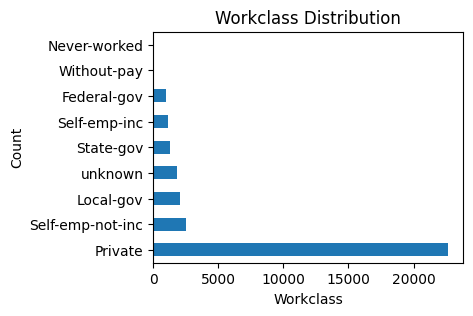

In [17]:
# Workclass feature
value_counts = df['workclass'].value_counts()

plt.figure(figsize=(4, 3))
value_counts.plot(kind='barh')

# Add labels and a title
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.title('Workclass Distribution')

plt.show()

- finlwgt(final weight): It indicates the number of people the census believes the entry represents.
- It is less related to income.

In [18]:
# Education and education_num features
print(df['education'].unique())
print(df['education-num'].unique())

['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]


- `education-num:` This is code number for different values in 'education' column. It represents the same information as 'education' column.

In [19]:
# Occupation feature
df['occupation'].value_counts()

occupation
Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
unknown              1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: count, dtype: int64

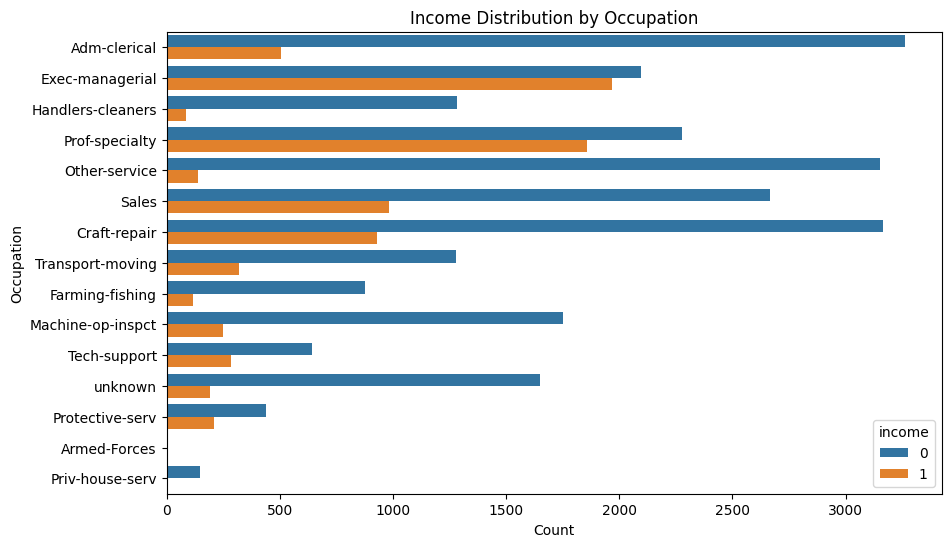

In [20]:
plt.figure(figsize=(10, 6)) 

sns.countplot(data=df, y='occupation', hue='income')

# Add labels and a title
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.title('Income Distribution by Occupation')

plt.show()

- The top occupation(in terms of count) is 'Prof-specialty' and the least one is 'Armed-Forces'
- Here also one occupation is marked as '?'
- replaced '?' by 'Unknown'.

---------
- In <=50K income category, highest number of people are in 'Adm-clerical' occupation followed by 'Craft-repair' and 'Other service'.
- In >50K income category, 'Exec-managerial' topped in terms of count, followed by 'Prof-specialty' occupation.


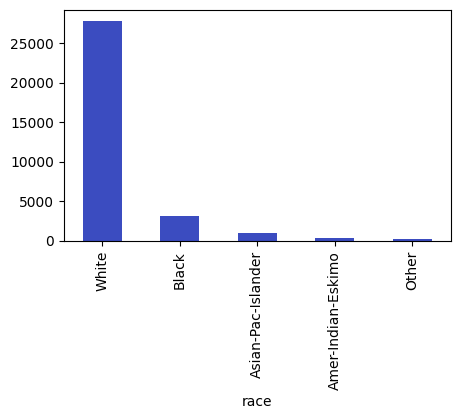

In [21]:
# Race column
plt.figure(figsize=(5,3))
df['race'].value_counts().plot(kind='bar', colormap="coolwarm")

plt.show()

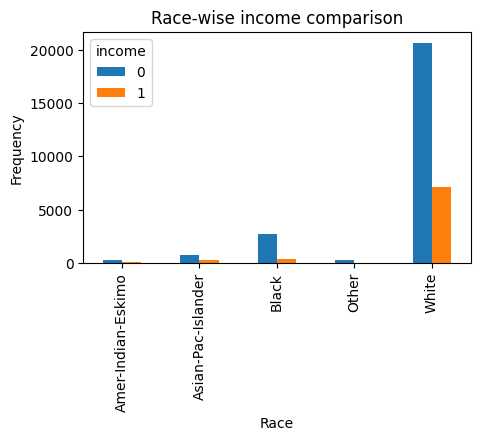

In [22]:
# Race-wise income comparison
pd.crosstab(index=df['race'], columns=df['income']).plot(kind='bar', figsize=(5,3))
plt.title("Race-wise income comparison")
plt.xlabel("Race")
plt.ylabel("Frequency")
plt.show()

- Clearly, white people are getting more opportunities as compared to others (in both income categories), a harsh reality of world.
- One can argue that this is because the whites are more in number as dataset participants, but it's still a fact.

In [23]:
df['education'].value_counts()

education
HS-grad         10494
Some-college     7282
Bachelors        5353
Masters          1722
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           645
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           332
1st-4th           166
Preschool          50
Name: count, dtype: int64

- The mostly employed people are those who completed High School graduation.
- The least employed people are those who have only Preschool education.

In [24]:
# No of people according to education and income
df.groupby(['education', 'income']).size().reset_index().rename(columns={0:'No of people'})

,education,income,No of people
0,10th,0,871
1,10th,1,62
2,11th,0,1115
3,11th,1,60
4,12th,0,400
5,12th,1,33
6,1st-4th,0,160
7,1st-4th,1,6
8,5th-6th,0,316
9,5th-6th,1,16


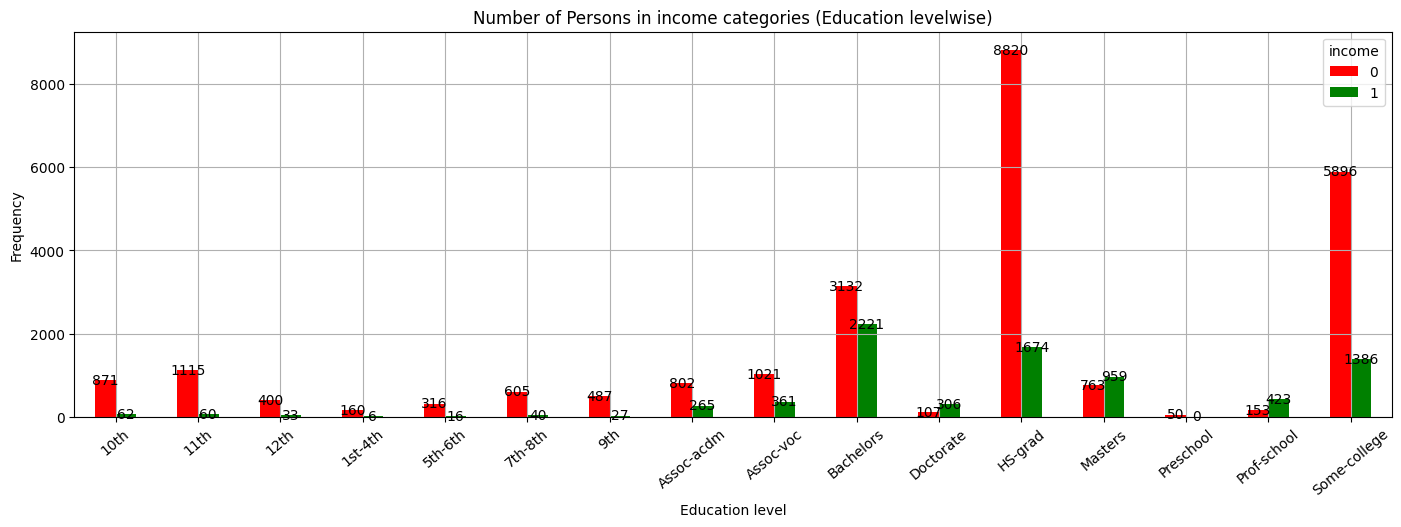

In [25]:
# Education levelwise income comparison
cross_tab = pd.crosstab(index=df['education'], columns=df['income'])
ax = cross_tab.plot(kind='bar', figsize=(17, 5), color=['red', 'green'], grid=True)

plt.title("Number of Persons in income categories (Education levelwise)")
plt.xlabel("Education level")
plt.xticks(rotation=40)
plt.ylabel("Frequency")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black')

plt.show()

- Maximum are High School graduates.
- Maximum number of people who have >50k $ annual income are those who got job after their Bachelor degree.
- No Preschool pass out has income >50K and this category people are least employed.

In [26]:
# Workclass feature
df['workclass'].value_counts()

workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
unknown              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

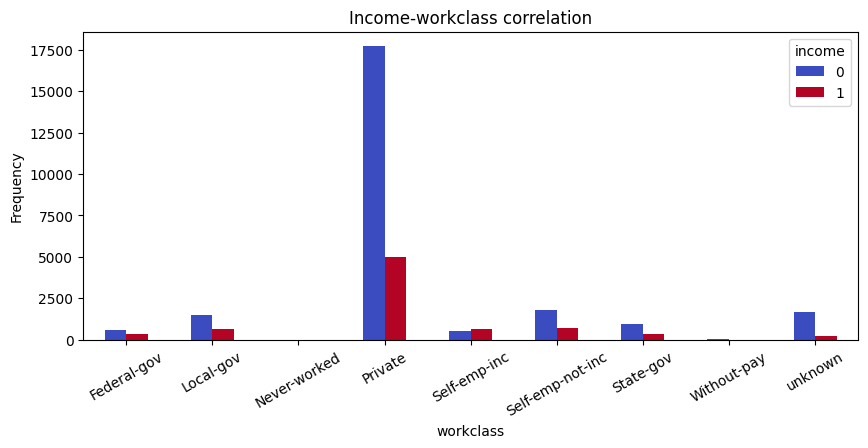

In [27]:
pd.crosstab(df['workclass'],df['income']).plot(kind="bar",figsize=(10,4), colormap="coolwarm")
plt.title('Income-workclass correlation')
plt.xticks(rotation=30)
plt.ylabel('Frequency')
plt.show()

In [28]:
df['native-country'].value_counts()

native-country
United-States                 29153
Mexico                          639
Unknown                         582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Japan                            62
Guatemala                        62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

- The data is majorly inclined towards persons who are native to USA.
- One of the countries is (probably) not known in the survey(weird case) and it is represented by '?'.

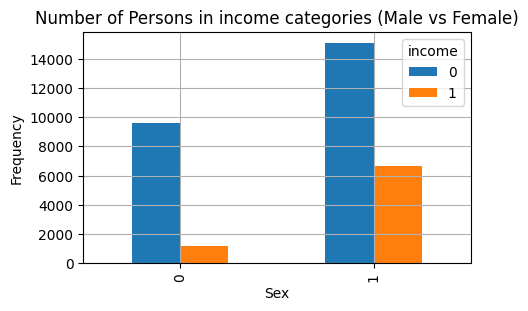

In [29]:
# Genderwise income comparison
pd.crosstab(index=df['sex'], columns=df['income']).plot(kind='bar', figsize=(5,3), grid=True)
plt.title("Number of Persons in income categories (Male vs Female)")
plt.xlabel("Sex")
plt.ylabel("Frequency")
plt.show()

- In both income categories, male individuals are higher in number (overall also higher in the whole collected sample.)
- In '>50K' income category, males are almost 6.5 times female individuals.

<Axes: xlabel='relationship', ylabel='count'>

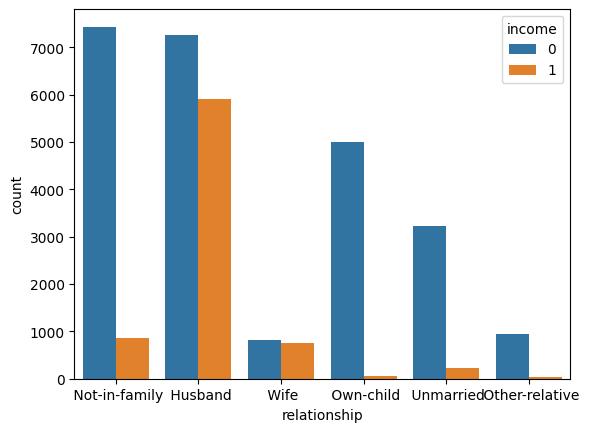

In [30]:
# Relationship feature
sns.countplot(data= df, x= 'relationship', hue= 'income')

- 'Not-in-family' persons are more in <=50K income category for the similar probable reason as in case of 'Never-married' marital status.
- Then followed by Husbands who keep their work life going (for themselves as well as for their family, usual case in any country).
- In >50K income category, Husbands topped, for the simple reason, again, that they have got work and life experiences and they have lots of responsibilities also.
- But surprisingly wives do not have the same case (neither in <=50K income nor in >50K income).
- The reason could be that the number of females in this income survey (or in the dataset) are quite less than males.
- Therefore, the visualization here is not depicting a closer real life picture of income scenerio, even after gender equality has become key concern in both social and work life.


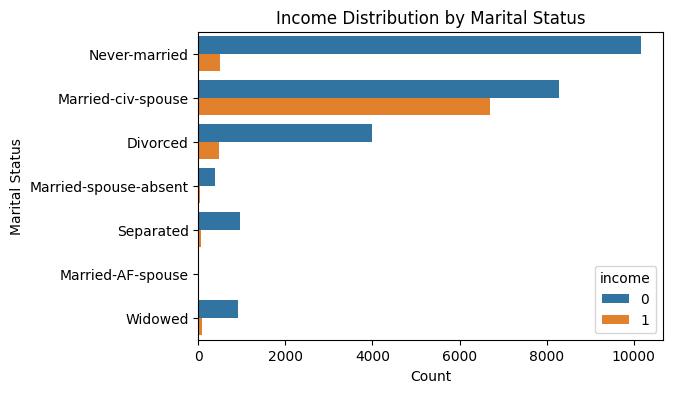

In [31]:
# Marital status feature
plt.figure(figsize=(6, 4))
sns.countplot(data=df, y='marital-status', hue='income')

plt.xlabel('Count')
plt.ylabel('Marital Status')
plt.title('Income Distribution by Marital Status')

plt.show()


In [32]:
# Marital status feature
df['marital-status'] = df['marital-status'].replace(["Married-civ-spouse", "Married-AF-spouse",  "Married-spouse-absent"], 'Married')

- Marital status has 3 similar ‘married’ levels, these can be combined into one ‘married’ class.

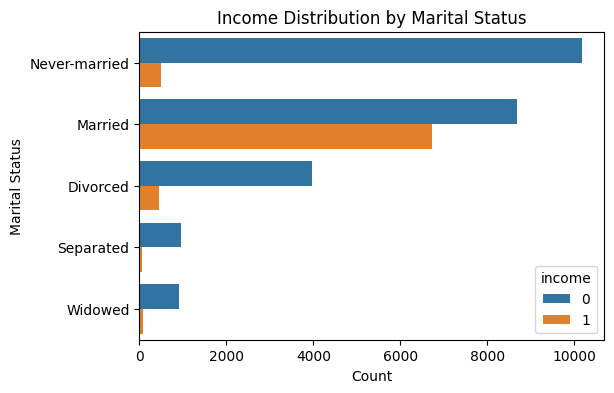

In [33]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, y='marital-status', hue='income')

plt.xlabel('Count')
plt.ylabel('Marital Status')
plt.title('Income Distribution by Marital Status')

plt.show()


- Looks like unmarried persons(maybe fresh college passouts or ones with less experience) are highest in number in <=50K income category (most companies/organisations hunt such people).
- Married persons are getting more salaries (the most probable reason being that they have gained nice work experience).
- But those who are not in 'Never-married' category but fall in other(i.e., they might have some experience), are also getting less income(i.e., not >50K).
- The simple logic that can be drawn is that a married person has responsibilities of his/her family and that's what drives him/her more (in comparison to others) to work harder and getting promoted.


array([[<Axes: title={'center': 'hours-per-week'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'education-num'}>, <Axes: >]],
      dtype=object)

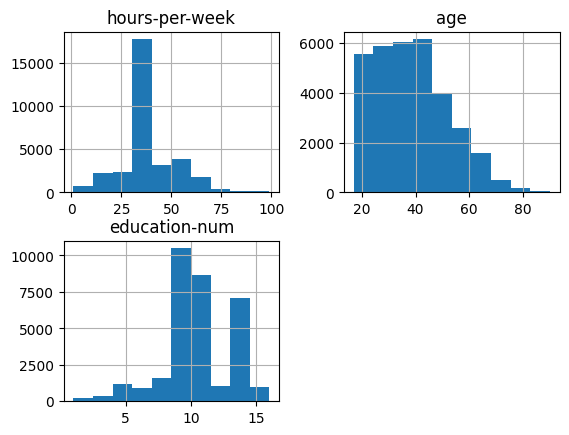

In [34]:
df[['hours-per-week','age','education-num']].hist()

<Axes: xlabel='hours-per-week', ylabel='count'>

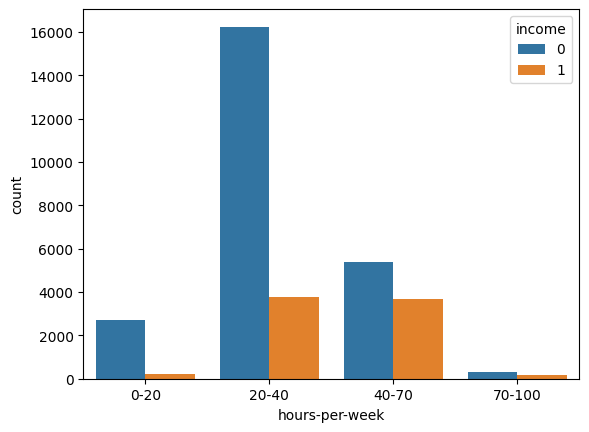

In [35]:
xx = pd.cut(df['hours-per-week'], bins=[0,20,40,70,100], include_lowest=True, labels=['0-20', '20-40', '40-70','70-100'])
sns.countplot(x=xx, hue=df["income"])

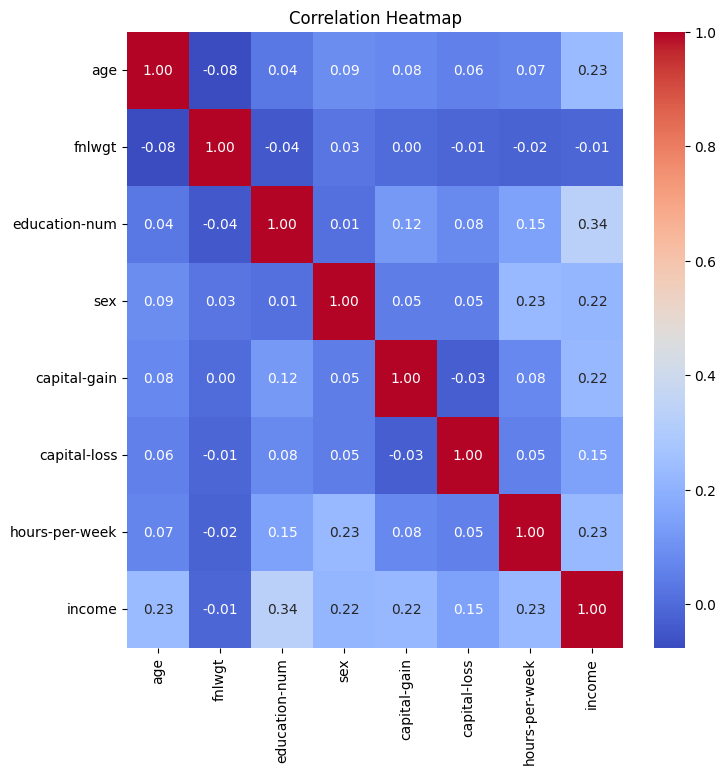

In [36]:
# Correlation between numerical features
numeric_columns = df.select_dtypes(include=['float64', 'int64','int32'])

corr = numeric_columns.corr()

plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)

plt.title("Correlation Heatmap")
plt.show()


### Outliers detection

<Axes: xlabel='age'>

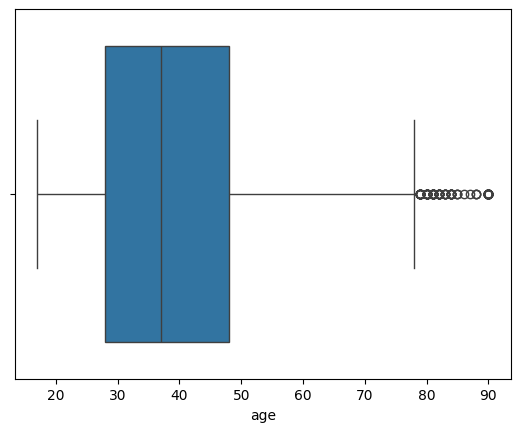

In [37]:
sns.boxplot(df['age'],  orient='h') 

In [38]:
# Removing outliers
df = df.loc[df['age']<76]
df.shape

(32297, 15)

<Axes: xlabel='age'>

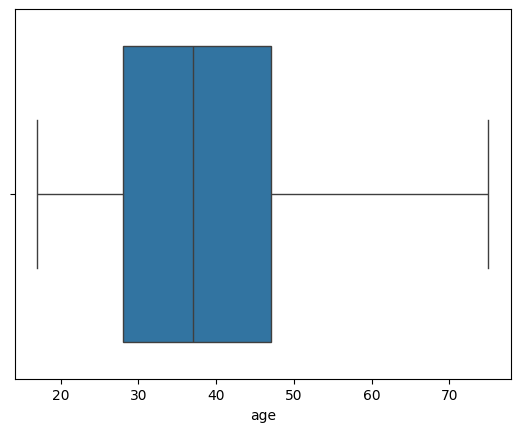

In [39]:
sns.boxplot(df['age'],  orient='h') 

<Axes: xlabel='fnlwgt'>

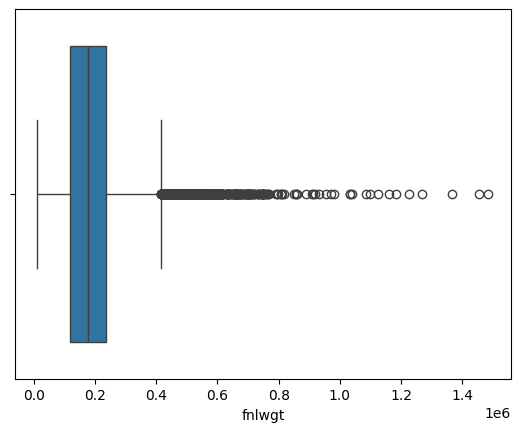

In [40]:
# Final weight feature
sns.boxplot(df['fnlwgt'],  orient='h') 

- As this feature is less related to income this can drop from the dataset.

<Axes: xlabel='hours-per-week'>

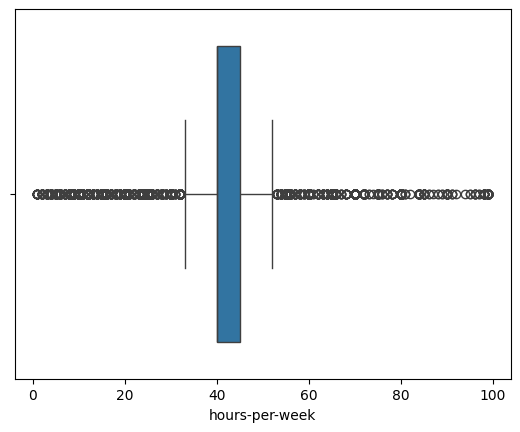

In [41]:
# Hours-per-week feature
sns.boxplot(df['hours-per-week'],  orient='h') 

In [42]:
# For 'hours_per_week' column
# Calculate the quartiles and IQR
Q3 = df['hours-per-week'].quantile(0.75)
Q1 = df['hours-per-week'].quantile(0.25)
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lf = Q1 - 1.5 * IQR
uf = Q3 + 1.5 * IQR

def replace_outliers(value):
    if value < lf:
        return lf
    elif value > uf:
        return uf
    else:
        return value

# Apply the custom function to the 'hours_per_week' column
df['hours-per-week'] = df['hours-per-week'].apply(replace_outliers)


<Axes: xlabel='hours-per-week'>

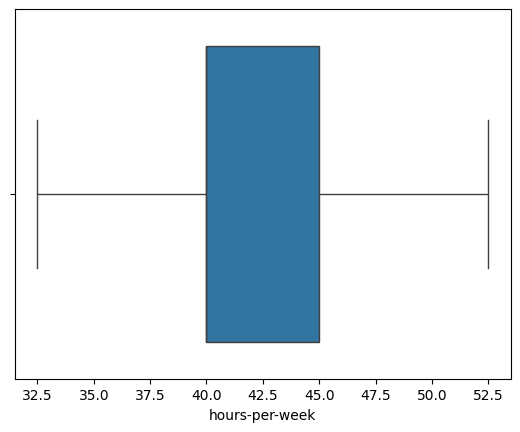

In [43]:
# Hours-per-week feature
sns.boxplot(df['hours-per-week'],  orient='h') 

<Axes: xlabel='capital-gain'>

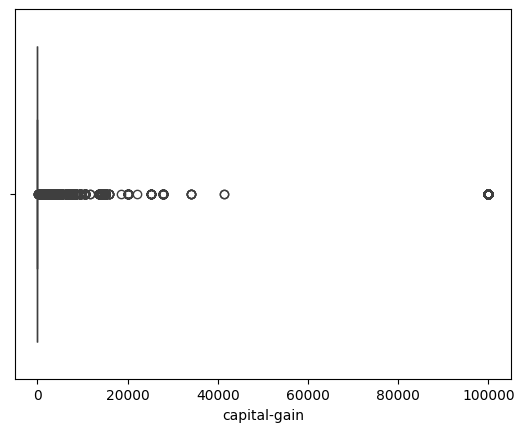

In [44]:
sns.boxplot(df['capital-gain'],  orient='h') 

In [45]:
df.loc[df['capital-gain']==99999]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1246,54,Self-emp-inc,166459,Prof-school,15,Married,Prof-specialty,Husband,White,1,99999,0,52.5,United-States,1
1368,52,Private,152234,HS-grad,9,Married,Exec-managerial,Husband,Asian-Pac-Islander,1,99999,0,40.0,Japan,1
1482,53,Self-emp-inc,263925,HS-grad,9,Married,Sales,Husband,White,1,99999,0,40.0,United-States,1
1528,52,Private,118025,Bachelors,13,Married,Exec-managerial,Husband,White,1,99999,0,50.0,United-States,1
1616,46,Private,370119,Prof-school,15,Married,Prof-specialty,Husband,White,1,99999,0,52.5,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31828,47,Private,155664,Masters,14,Married,Exec-managerial,Husband,White,1,99999,0,52.5,United-States,1
31972,43,Self-emp-inc,62026,Prof-school,15,Married,Exec-managerial,Husband,White,1,99999,0,40.0,United-States,1
32090,66,Private,115498,Bachelors,13,Married,Exec-managerial,Husband,White,1,99999,0,52.5,Unknown,1
32238,47,Private,294913,Prof-school,15,Married,Exec-managerial,Husband,White,1,99999,0,40.0,United-States,1


- All these people have income >50K. And there are 159 such entries. We must retain these entries because we can always find a few such sections in most of the societies or countries.

<Axes: xlabel='capital-loss'>

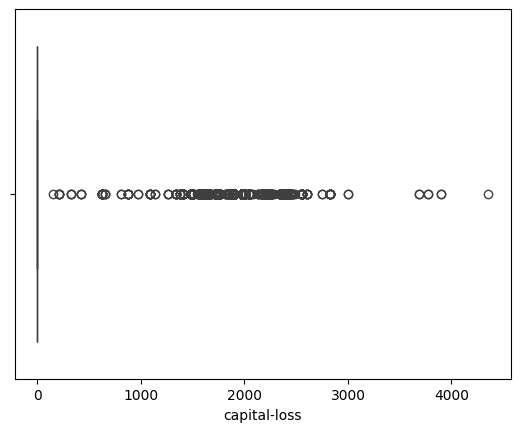

In [46]:
sns.boxplot(df['capital-loss'],  orient='h') 

- capital_gain' and 'capital_loss' columns are filled with outliers. Their 1st and 3rd quartiles are also 0.



- After visualizing the data and identifying the columns that are not useful for the modeling process, I removed those columns from the dataset. This helps to simplify the dataset and prevent irrelevant or redundant information from impacting the model's performance


In [47]:
df['relationship'] = df['relationship'].replace(["Husband", "Wife"], 'Spouse')

- The relationship variable has two similar values, wife and husband, which signals the same idea, of being a spouse.

### Identifying input and output:

In [49]:
df1 = df.copy()

In [50]:
x = df1.drop(columns=['income','fnlwgt','education','capital-loss'])
y = df1.iloc[:,-1]

### Spliting the data into train and test

In [51]:
print(x.shape)
print(y.shape)

(32297, 11)
(32297,)


In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [53]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(25837, 11)
(25837,)
(6460, 11)
(6460,)


### Dividing categorical and Numerical features

In [54]:
# Train data
x_train_num = x_train.select_dtypes(include=['float64', 'int64','int32'])
x_train_cat = x_train.select_dtypes(include=['object'])
# Test data
x_test_num = x_test.select_dtypes(include=['float64', 'int64','int32'])
x_test_cat = x_test.select_dtypes(include=['object'])

In [55]:
print(x_train_num.shape)
print(x_train_cat.shape)
print(x_test_num.shape)
print(x_test_cat.shape)

(25837, 5)
(25837, 6)
(6460, 5)
(6460, 6)


### Rescaling input features 

In [56]:
# Rescaling Numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# After the scalling column names will be lost 
x_train_num_rescaled = pd.DataFrame(scaler.fit_transform(x_train_num),
                                         columns= x_train_num.columns,
                                         index = x_train_num.index)

In [57]:
x_test_num_rescaled = pd.DataFrame(scaler.transform(x_test_num),
                                        columns= x_test_num.columns,
                                        index = x_test_num.index)

In [58]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse=False)

# Creating dataframe as columns will be in array format after OneHot Encoding
x_train_cat_OneEnc = pd.DataFrame(encoder.fit_transform(x_train_cat), 
                               columns=encoder.get_feature_names_out(x_train_cat.columns), 
                               index = x_train_cat.index)

In [59]:
# OneHotEncoding the (Nominal)categorical features

# Creating dataframe as columns will be in array format after OneHot Encoding
x_test_cat_OneEnc = pd.DataFrame(encoder.transform(x_test_cat), 
                               columns=encoder.get_feature_names_out(x_test_cat.columns), 
                               index = x_test_cat.index)

#### Concatinating categorical  and Numerical Features

In [60]:
x_train_transformed = pd.concat([x_train_cat_OneEnc,x_train_num_rescaled],axis = 1)
x_test_transformed = pd.concat([x_test_cat_OneEnc,x_test_num_rescaled],axis = 1)

## Treating Imbalance Data

In [61]:
# pip install imblearn

In [62]:
# pip install --upgrade scikit-learn imbalanced-learn

In [63]:
from imblearn.over_sampling import SMOTE # SMOTE is a class
s = SMOTE()
x_train_transformed,y_train = s.fit_resample(x_train_transformed,y_train)

In [64]:
print(x_train_transformed.shape)
print(y_train.shape)

(39144, 81)
(39144,)


In [65]:
# Checking target variable balanced or not 
y_train.value_counts()

income
0    19572
1    19572
Name: count, dtype: int64

- Now the data is balanced and we may get accurate results and model won't effect the results.

## Building Logical Structure

In [66]:
import tensorflow as tf
import keras_tuner as kt

from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

Using TensorFlow backend


#### **Step-1:** creating a function

In [188]:
# List of models with all initializations

def best_model(hp):
    model=Sequential()
    model.add(Input(shape=(x_train_transformed.shape[1],)))
    
    for i in range(hp.Int("hiddenlayers",min_value=5,max_value=10)):
                model.add(Dense(units=hp.Int("neurons{}".format(i),min_value=1,max_value=15),activation="tanh",kernel_initializer=hp.Choice("weight_init",values=["glorot_uniform","glorot_normal","he_uniform","he_normal"])))
                model.add(BatchNormalization())             
                model.add(Dropout(rate=hp.Float("dropout", min_value=0.0, max_value=0.5)))            
    model.add(Dense(1,activation="sigmoid"))
    optimizer_choice = hp.Choice('optimizer', values=['sgd', 'adam', 'rmsprop', 'adadelta'])
    
    model.compile(loss='binary_crossentropy', optimizer=optimizer_choice, metrics=['accuracy'])
    return model  


#### **Step-2:** calling function using tuner()

In [189]:
# List of models with all initializations
tuner=kt.RandomSearch(best_model,objective="val_accuracy",max_trials=5,directory=r"10_final",project_name="list_of_models_1")


Reloading Tuner from 10_final\list_of_models_1\tuner0.json


#### **Step-3:** Training

In [190]:
# List of models with all initializations - Training
tuner.search(x_train_transformed,y_train,epochs=10,validation_data=(x_test_transformed,y_test))

In [191]:
tuner.results_summary()

Results summary
Results in 10_final\list_of_models_1
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 0 summary
Hyperparameters:
hiddenlayers: 6
neurons0: 14
weight_init: he_uniform
dropout: 0.08702518361214184
neurons1: 7
neurons2: 6
neurons3: 4
neurons4: 6
optimizer: rmsprop
neurons5: 1
Score: 0.8190402388572693

Trial 2 summary
Hyperparameters:
hiddenlayers: 7
neurons0: 9
weight_init: he_uniform
dropout: 0.043700733543213854
neurons1: 12
neurons2: 5
neurons3: 4
neurons4: 3
optimizer: adam
neurons5: 3
neurons6: 3
Score: 0.8122290968894958

Trial 4 summary
Hyperparameters:
hiddenlayers: 8
neurons0: 7
weight_init: he_normal
dropout: 0.4161210598460268
neurons1: 8
neurons2: 1
neurons3: 6
neurons4: 4
optimizer: rmsprop
neurons5: 9
neurons6: 11
neurons7: 1
Score: 0.7791021466255188

Trial 1 summary
Hyperparameters:
hiddenlayers: 7
neurons0: 12
weight_init: he_uniform
dropout: 0.3248978960683676
neurons1: 3
neurons2: 7
neurons3: 7
neurons4: 3
optimizer: adadelt

In [192]:
# Best hyper parameters
tuner.get_best_hyperparameters()[0].values

{'hiddenlayers': 6,
 'neurons0': 14,
 'weight_init': 'he_uniform',
 'dropout': 0.08702518361214184,
 'neurons1': 7,
 'neurons2': 6,
 'neurons3': 4,
 'neurons4': 6,
 'optimizer': 'rmsprop',
 'neurons5': 1}

In [193]:
# Best model is saved to variable
fmodel = tuner.get_best_models(num_models=1)[0]

In [194]:
fmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                1148      
                                                                 
 batch_normalization (Batch  (None, 14)                56        
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 batch_normalization_1 (Bat  (None, 7)                 28        
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0

In [195]:
hist=fmodel.fit(x_train_transformed,y_train,batch_size=15,epochs=20,validation_split=0.15)

Epoch 1/20
2219/2219 [==============================] - 13s 4ms/step - loss: 0.4678 - accuracy: 0.7768 - val_loss: 0.4243 - val_accuracy: 0.8278
Epoch 2/20
2219/2219 [==============================] - 10s 5ms/step - loss: 0.4577 - accuracy: 0.7795 - val_loss: 0.4503 - val_accuracy: 0.7997
Epoch 3/20
2219/2219 [==============================] - 11s 5ms/step - loss: 0.4531 - accuracy: 0.7808 - val_loss: 0.4957 - val_accuracy: 0.7599
Epoch 4/20
2219/2219 [==============================] - 12s 5ms/step - loss: 0.4523 - accuracy: 0.7819 - val_loss: 0.4386 - val_accuracy: 0.7946
Epoch 5/20
2219/2219 [==============================] - 11s 5ms/step - loss: 0.4496 - accuracy: 0.7840 - val_loss: 0.4425 - val_accuracy: 0.7960
Epoch 6/20
2219/2219 [==============================] - 9s 4ms/step - loss: 0.4516 - accuracy: 0.7813 - val_loss: 0.3996 - val_accuracy: 0.8798
Epoch 7/20
2219/2219 [==============================] - 9s 4ms/step - loss: 0.4469 - accuracy: 0.7845 - val_loss: 0.4410 - val_accu

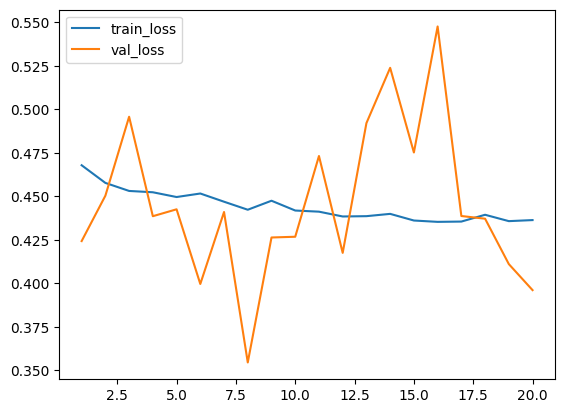

In [196]:
# Train and validate loss trade off
plt.plot(range(1,21),hist.history["loss"],label="train_loss")
plt.plot(range(1,21),hist.history["val_loss"],label="val_loss")
plt.legend()

In [197]:
hist.history['val_loss']

[0.4242633879184723,
 0.4503275752067566,
 0.49567893147468567,
 0.4385526776313782,
 0.4425143897533417,
 0.3996267318725586,
 0.44097185134887695,
 0.3545312285423279,
 0.4263272285461426,
 0.4267524778842926,
 0.47312986850738525,
 0.4174828827381134,
 0.49202343821525574,
 0.523779571056366,
 0.4751533567905426,
 0.5475332140922546,
 0.438656210899353,
 0.43712031841278076,
 0.4110497832298279,
 0.39609041810035706]

In [198]:
predicted=fmodel.predict(x_test_transformed)

202/202 [==============================] - 1s 2ms/step


In [199]:
predicted=np.where(predicted>=0.5,1,0)

In [200]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
print('accuracy:',accuracy_score(y_test,predicted))

accuracy: 0.8238390092879257


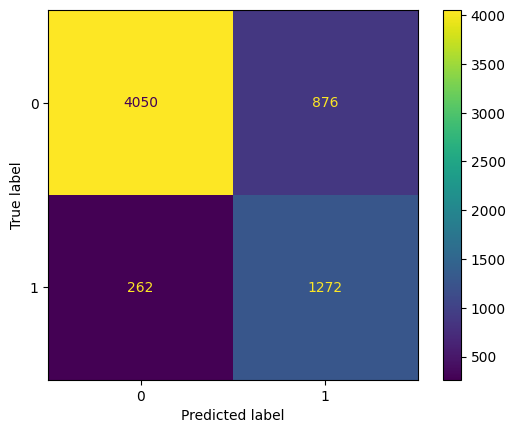

In [201]:
cm = confusion_matrix(y_test,predicted)
va = ConfusionMatrixDisplay(cm)
va.plot()
plt.show()

### method 2

In [176]:
# list of models relu

def best_model(hp):
    model=Sequential()
    model.add(Input(shape=(x_train_transformed.shape[1],)))
    
    for i in range(hp.Int("hiddenlayers",min_value=5,max_value=10)):
                model.add(Dense(units=hp.Int("neurons{}".format(i),min_value=1,max_value=15),activation="tanh"))                
                
    model.add(Dense(1,activation="sigmoid"))
    # optimizer_choice = hp.Choice('optimizer', values=['sgd', 'adam', 'rmsprop', 'adadelta'])
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [177]:
tuner=kt.RandomSearch(best_model,objective="val_accuracy",max_trials=5,directory=r"10_final",project_name="list_of_models_3")

In [178]:
tuner.search(x_train_transformed,y_train,epochs=10,validation_data=(x_test_transformed,y_test))

Trial 5 Complete [00h 00m 45s]
val_accuracy: 0.8241485953330994

Best val_accuracy So Far: 0.8267802000045776
Total elapsed time: 00h 03m 39s


In [179]:
tuner.get_best_hyperparameters()[0].values

{'hiddenlayers': 9,
 'neurons0': 6,
 'neurons1': 4,
 'neurons2': 12,
 'neurons3': 10,
 'neurons4': 10,
 'neurons5': 10,
 'neurons6': 1,
 'neurons7': 9,
 'neurons8': 2,
 'neurons9': 2}

In [180]:
fmodel = tuner.get_best_models(num_models=1)[0]
fmodel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 492       
                                                                 
 dense_1 (Dense)             (None, 4)                 28        
                                                                 
 dense_2 (Dense)             (None, 12)                60        
                                                                 
 dense_3 (Dense)             (None, 10)                130       
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 1)                 1

In [181]:
hist=fmodel.fit(x_train_transformed,y_train,batch_size=15,epochs=15,validation_split=0.15)

Epoch 1/15
2219/2219 [==============================] - 9s 3ms/step - loss: 0.3840 - accuracy: 0.8203 - val_loss: 0.4662 - val_accuracy: 0.7997
Epoch 2/15
2219/2219 [==============================] - 7s 3ms/step - loss: 0.3771 - accuracy: 0.8262 - val_loss: 0.3539 - val_accuracy: 0.8747
Epoch 3/15
2219/2219 [==============================] - 7s 3ms/step - loss: 0.3757 - accuracy: 0.8259 - val_loss: 0.4198 - val_accuracy: 0.8329
Epoch 4/15
2219/2219 [==============================] - 7s 3ms/step - loss: 0.3734 - accuracy: 0.8266 - val_loss: 0.4528 - val_accuracy: 0.8157
Epoch 5/15
2219/2219 [==============================] - 9s 4ms/step - loss: 0.3711 - accuracy: 0.8269 - val_loss: 0.4219 - val_accuracy: 0.8260
Epoch 6/15
2219/2219 [==============================] - 8s 4ms/step - loss: 0.3696 - accuracy: 0.8270 - val_loss: 0.4782 - val_accuracy: 0.7996
Epoch 7/15
2219/2219 [==============================] - 10s 5ms/step - loss: 0.3690 - accuracy: 0.8270 - val_loss: 0.3399 - val_accuracy

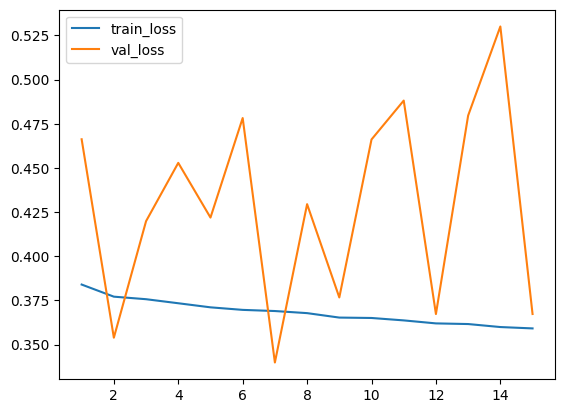

In [182]:
plt.plot(range(1,16),hist.history["loss"],label="train_loss")
plt.plot(range(1,16),hist.history["val_loss"],label="val_loss")
plt.legend()

### Prediction

In [183]:
predicted=fmodel.predict(x_test_transformed)

202/202 [==============================] - 0s 2ms/step


In [184]:
predicted=np.where(predicted>=0.5,1,0)

In [185]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [186]:
print('accuracy:',accuracy_score(y_test,predicted))

accuracy: 0.8241486068111455


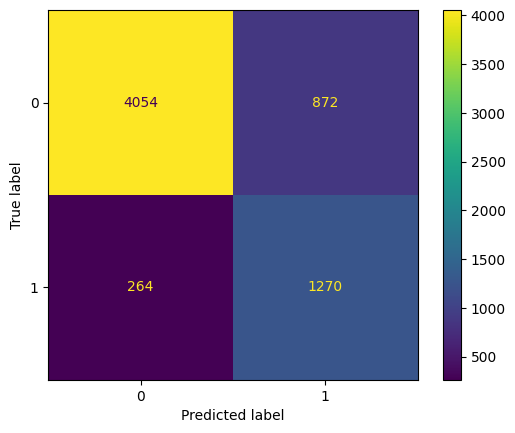

In [187]:
cm = confusion_matrix(y_test,predicted)
va = ConfusionMatrixDisplay(cm)
va.plot()
plt.show()

## **Conclusions:**

- The hyperparameters that yielded the best-performing model were discovered, including model architecture with six hidden layers, specific neuron counts in each layer, **'he_uniform'** weight initialization, and an **'rmsprop'** optimizer. These hyperparameters define the final model's configuration.
- The final model architecture is composed of **six dense hidden layers**, each followed by batch normalization and dropout layers to enhance model generalization and prevent overfitting.
- The final model was trained on the preprocessed dataset with 15 as the batch size and **20 training epochs**. During training, a validation split of 15% was used for performance monitoring.
- The model achieved an accuracy of approximately **82.38%** on the validation dataset. This result demonstrates the model's ability to generalise and make accurate predictions.
